In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [13]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Laplacian_With_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,1074,1321,1119,1017,641,516,739,488,528,2001,...,487,215,398,8972,4795,1125,893,1120,1040,1
1,7576,10171,10343,8763,9941,9413,5300,6376,5899,5800,...,7131,6631,6397,8175,8018,6910,7164,5510,6540,1
2,53278,53234,69372,72007,75511,73747,70448,62495,43791,45607,...,40124,28053,26904,33205,43384,31893,25258,35229,63726,1
3,17785,13114,62713,62284,15054,5559,5506,51215,54895,4182,...,4634,597,385,55820,57752,46603,2946,2824,1888,1
4,27003,27613,20871,18814,16686,11882,10807,15429,22022,17655,...,16114,15777,15620,19524,25247,22502,20136,13621,15005,1


In [14]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [15]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6524822695035462
              precision    recall  f1-score   support

          -1       0.74      0.79      0.77       101
           1       0.36      0.30      0.33        40

    accuracy                           0.65       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.63      0.65      0.64       141



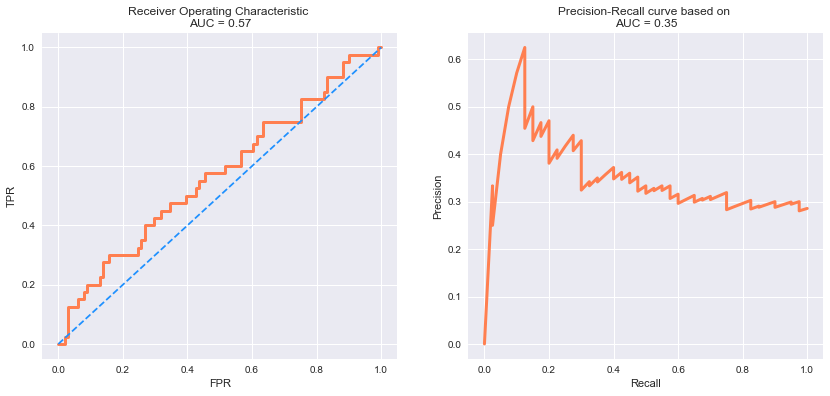

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()